## 1. 국가(대륙)별/상품군별 온라인 해외직접판매액

### 1.1 K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?

- e: 추정치, p:잠정치, -:자료없음, ...:미상자료, x:비밀보호, 역세모:시계열불연(단위:백만원)

## 2. 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name=="nt":
    sns.set(font="Malgun Gothic")

In [3]:
#글씨를 선명하게
%config InlineBackend.figure_format = 'retina'

## 3. 데이터 로드하기

In [4]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200602111111.csv",encoding="cp949")
df_raw.shape

(450, 27)

In [5]:
df_raw["국가(대륙)별"].value_counts()

일본            45
기타            45
아세안(ASEAN)    45
대양주           45
EU            45
합계            45
중남미           45
미국            45
중국            45
중동            45
Name: 국가(대륙)별, dtype: int64

In [6]:
df_raw[df_raw["국가(대륙)별"]=="미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40918,44861,55386,53848
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38261,41910,53568,52367
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1382
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,2033,1553,1784,1773,1298,1408,1653,1382
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1785
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1736
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


## 4. 분석과 시각화를 위한 tidy data만들기'

- melt를 통해 기간을 행으로 바꾼다. 그래서 기간별 분석을 가능하게 한다.

In [7]:
df = df_raw.melt(id_vars=["국가(대륙)별","상품군별","판매유형별"],
                 var_name="기간",value_name="백만원")
df.shape

(10800, 5)

In [8]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [9]:
df.info()
#데이터들의 형태가 object이기 때문에 전처리 작업이 필요하다.
#기간은 연도월별 구분하고 백만원 역시 숫자로 바꿔야한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
국가(대륙)별    10800 non-null object
상품군별       10800 non-null object
판매유형별      10800 non-null object
기간         10800 non-null object
백만원        10800 non-null object
dtypes: object(5)
memory usage: 422.0+ KB


## 5. 데이터 전처리

### 5.2 기간에서 연도를 분리하기

In [10]:
int("2014 1/4".split()[0])

2014

In [11]:
df["연도"]=df["기간"].map(lambda x: int(x.split()[0]))
df["분기"]=df["기간"].map(lambda x: int(x.split()[1].split('/')[0]))
#object는 string데이터이다.

### 5.2 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [12]:
#float으로 변경하는 이유는 nan의 데이터타입이 float이다.
df["백만원"]=df["백만원"].replace("-",pd.np.nan).astype(float)

### 5.3 필요없는 데이터 제거하기

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
국가(대륙)별    10800 non-null object
상품군별       10800 non-null object
판매유형별      10800 non-null object
기간         10800 non-null object
백만원        7200 non-null float64
연도         10800 non-null int64
분기         10800 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [14]:
#합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거한다.
df = df[(df['국가(대륙)별']!="합계") & (df['상품군별']!="합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
국가(대륙)별    9072 non-null object
상품군별       9072 non-null object
판매유형별      9072 non-null object
기간         9072 non-null object
백만원        6048 non-null float64
연도         9072 non-null int64
분기         9072 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [15]:
#결측치보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

## 6. K-Beauty 시각화

### 6.1 전체 상품군 판매액

In [16]:
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


In [20]:
df_total = df[df["판매유형별"]=="계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


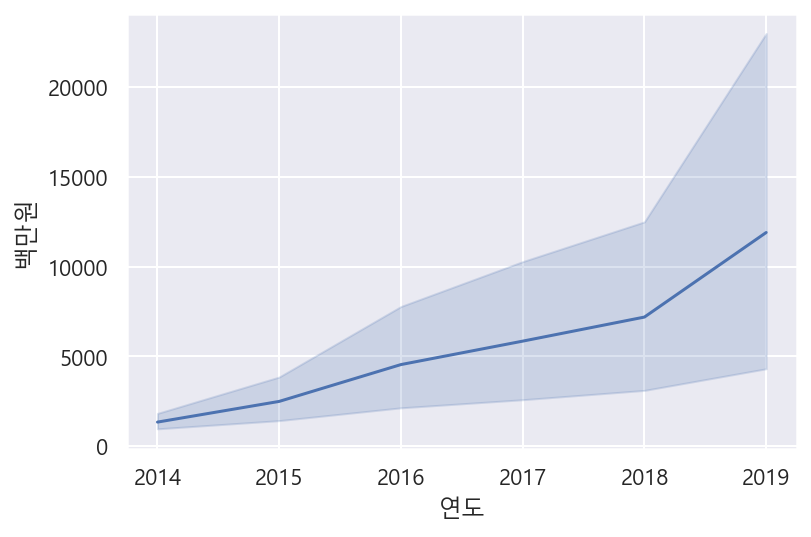

In [21]:
#연도, 판매액 lineplot으로 그리기
sns.lineplot(data=df_total,x="연도",y="백만원")

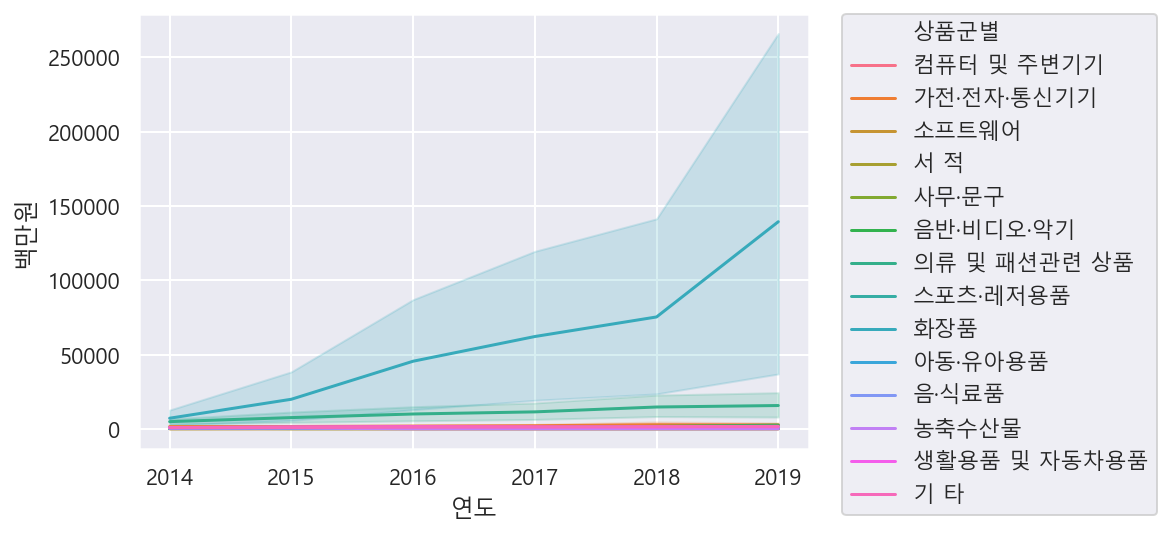

In [23]:
#legend 밖에 그리기
sns.lineplot(data=df_total,x="연도",y="백만원",hue="상품군별")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

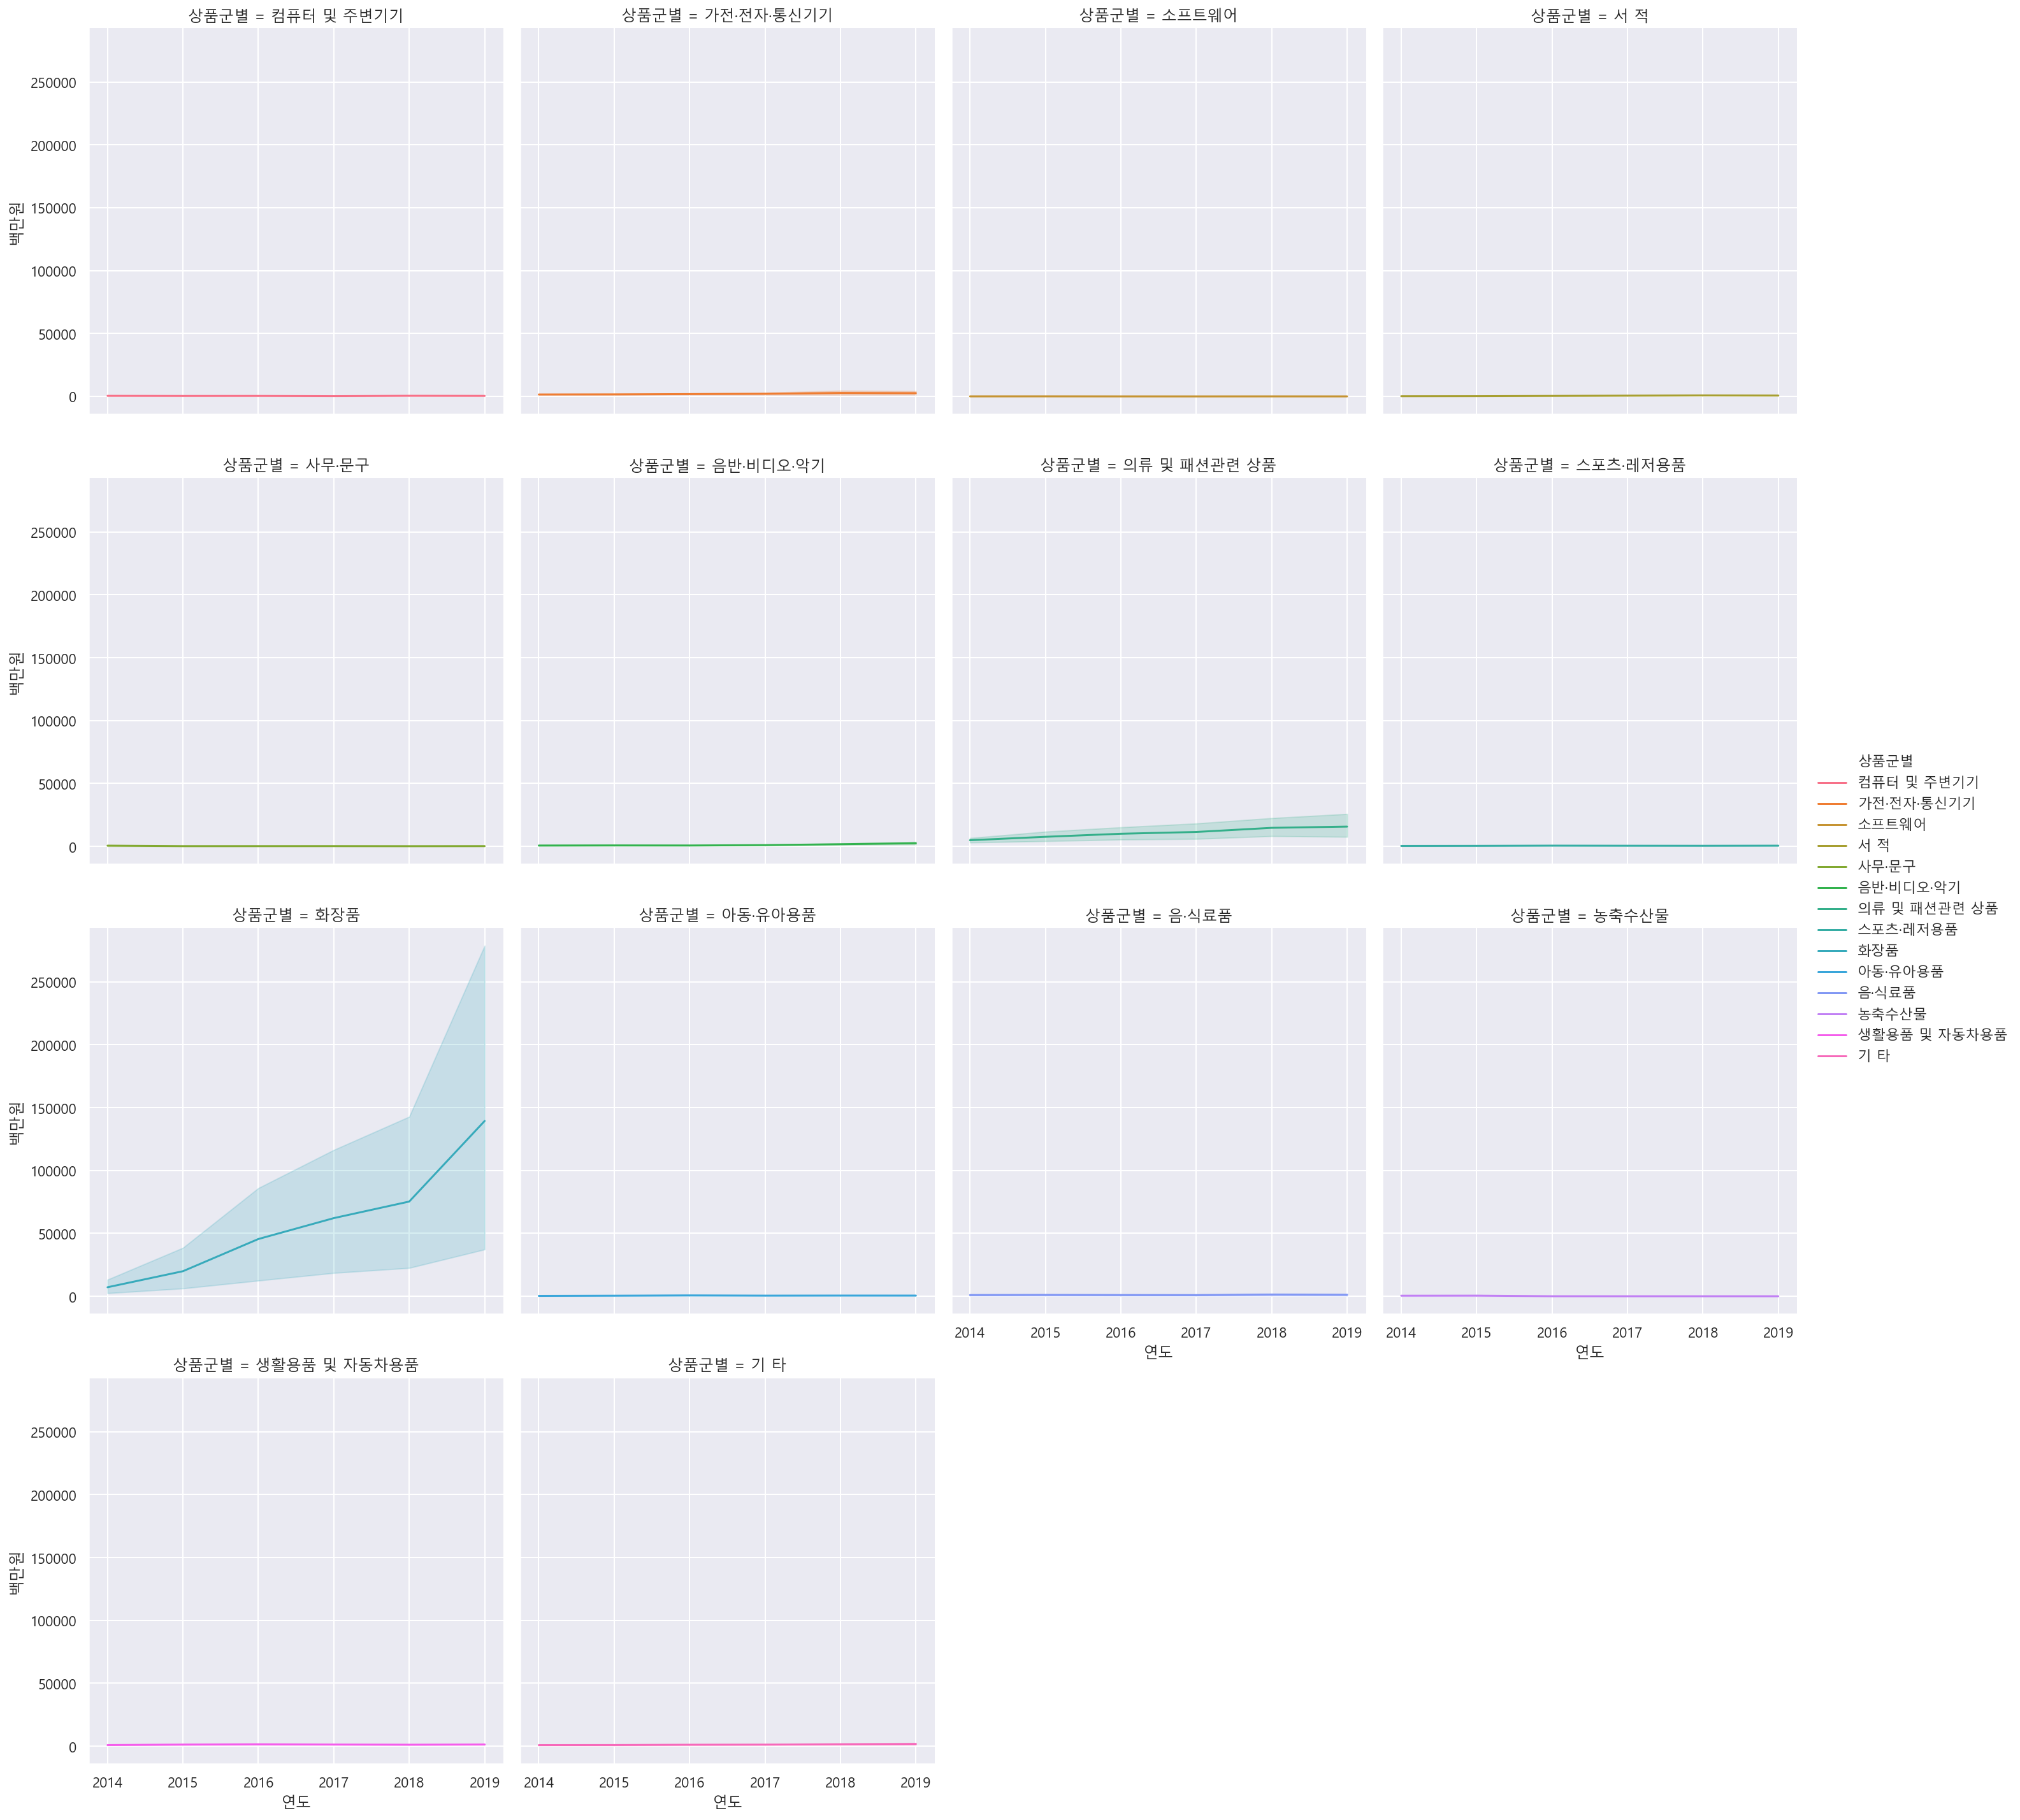

In [26]:
#위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기
sns.relplot(data=df_total,x="연도",y="백만원",
            hue="상품군별",kind="line",col="상품군별",col_wrap=4)

In [35]:
#isin을 사용해 화장품만 제외를 하고 df_sub 이라는 변수에 담습니다.
df_sub=df_total[~df_total["상품군별"].isin(["화장품","의류 및 패션관련 상품"])].copy()

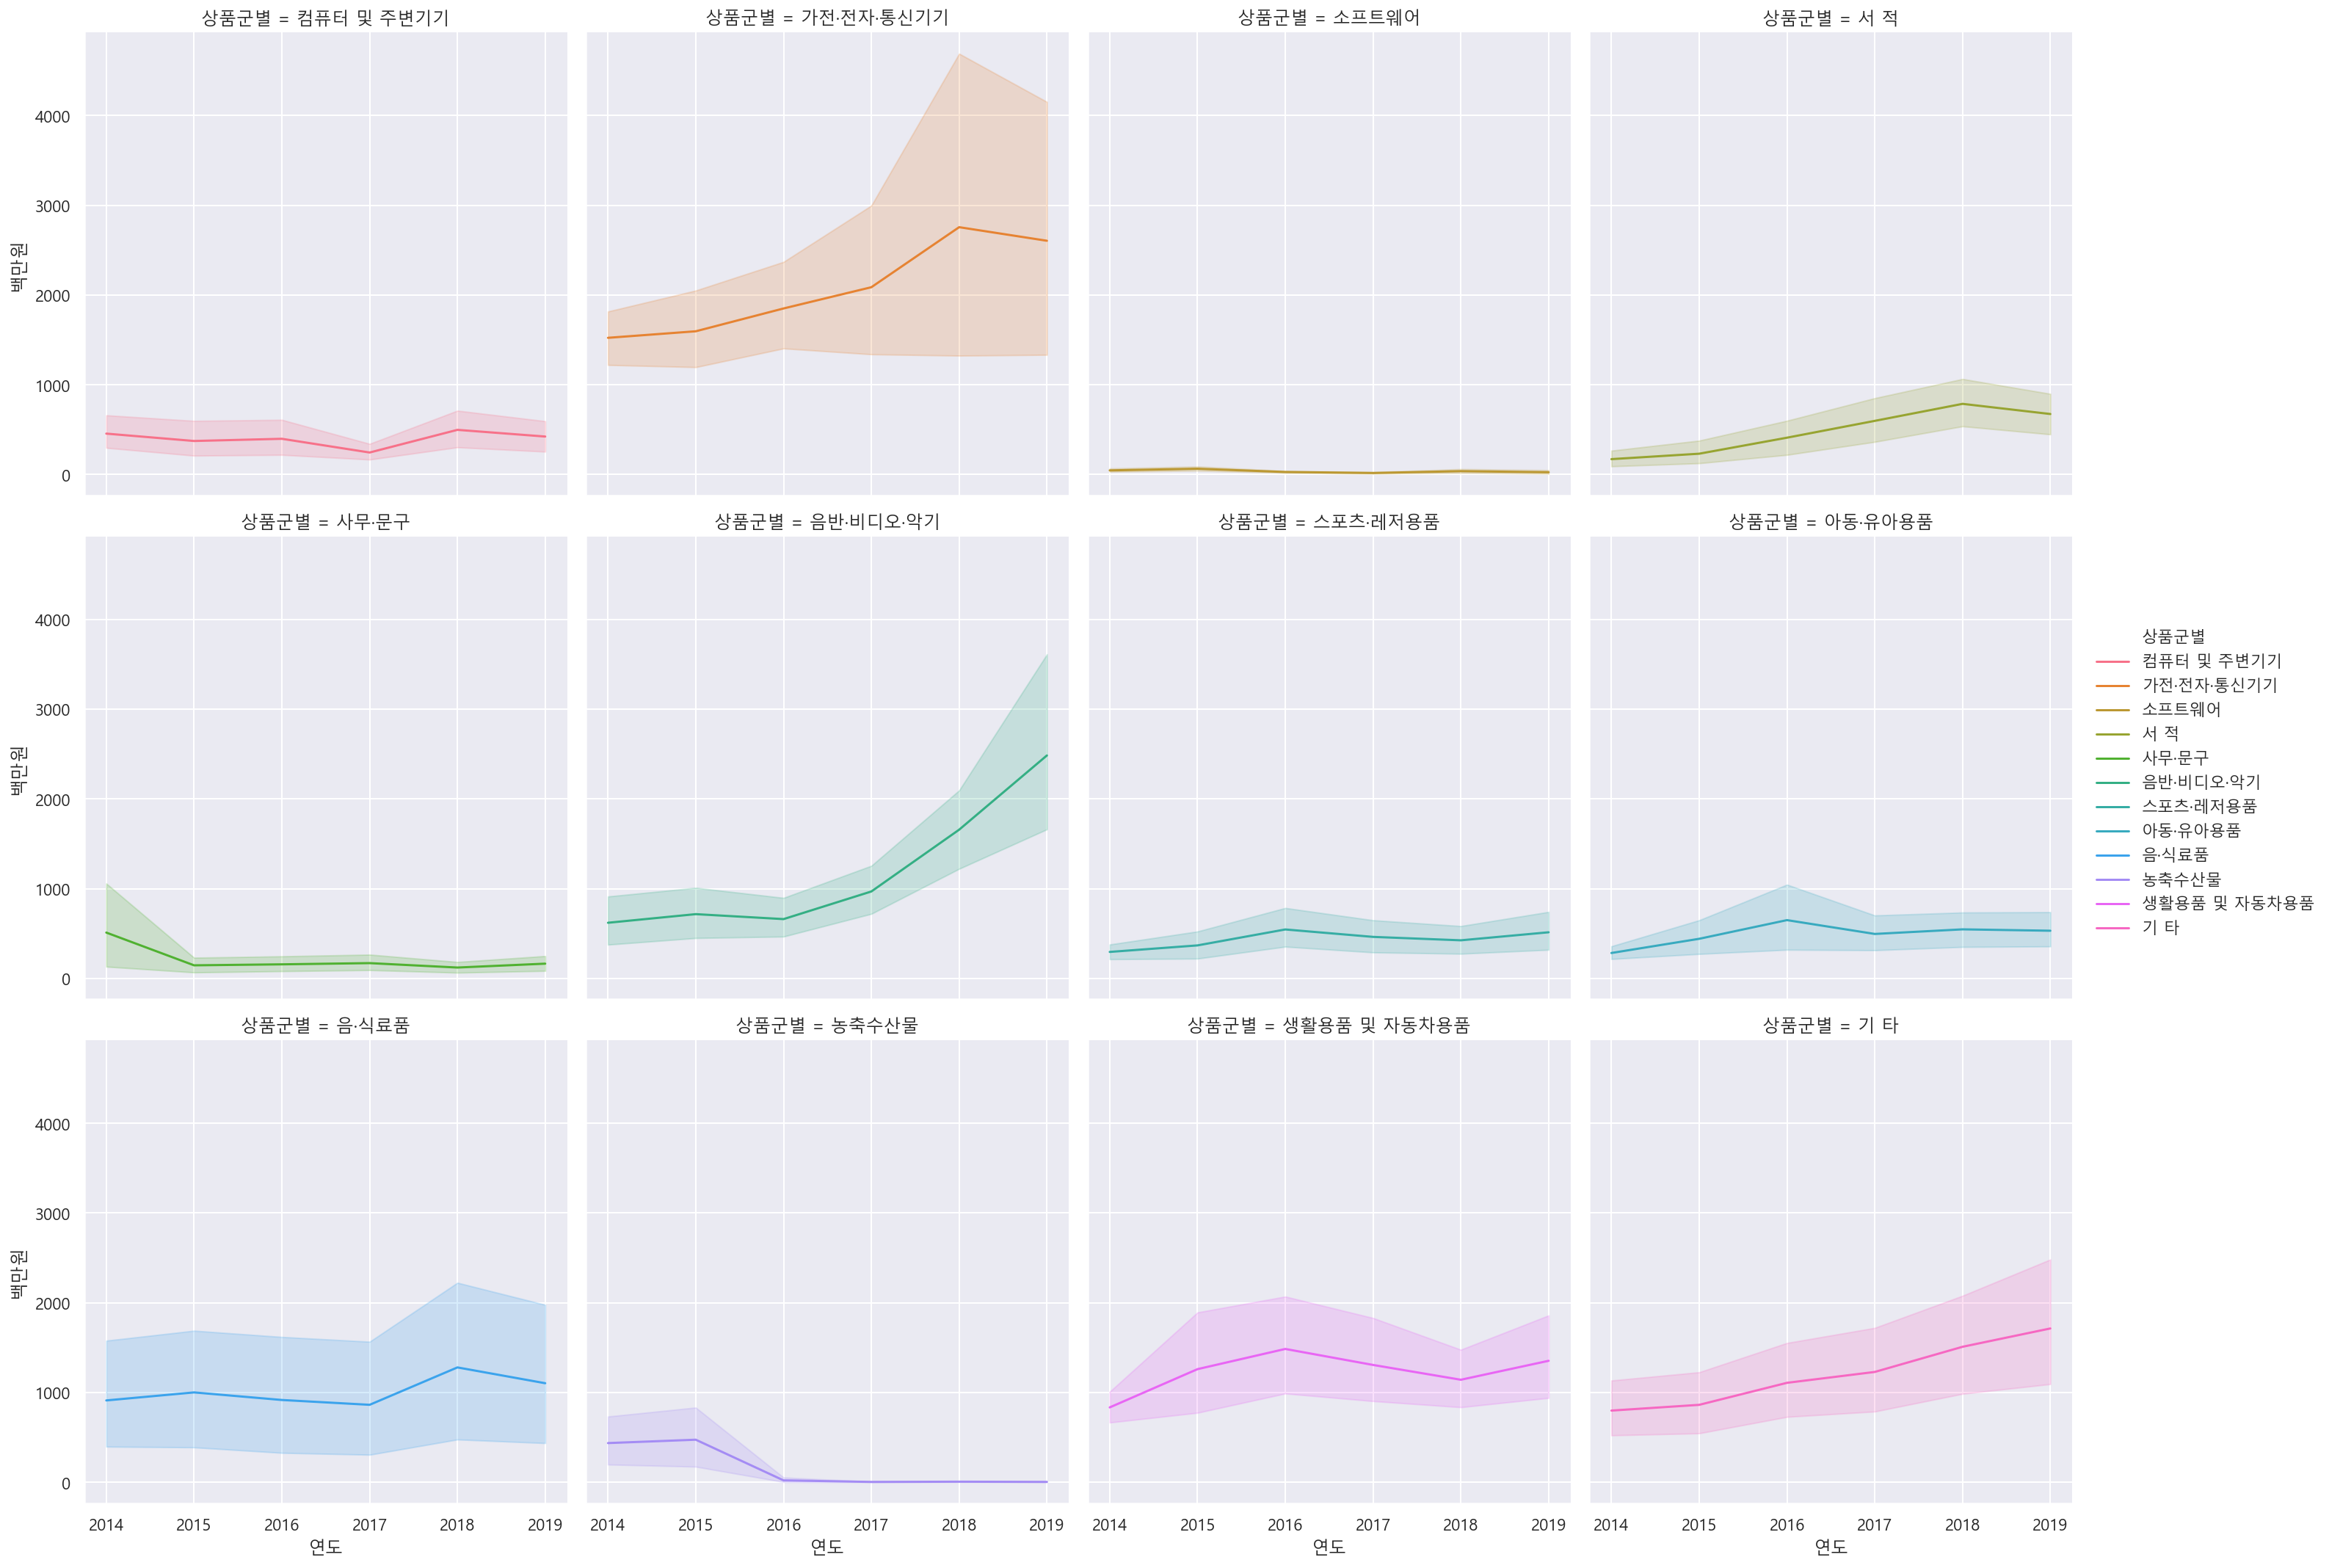

In [36]:
sns.relplot(data=df_sub,x="연도",y="백만원",hue="상품군별",
           kind="line",col="상품군별",col_wrap=4)
##화장품이랑 의류가 많이 증가하고 있다는 사실을 시각화를 통해 알 수 있다.

### 6.2 화장품의 온라인쇼핑 해외직접판매액

In [65]:
df_cosmetic =df_total[df_total["상품군별"]=="화장품"].copy()
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,EU,화장품,계,2014 1/4,937.0,2014,1
...,...,...,...,...,...,...,...
10602,EU,화장품,계,2019 4/4,3912.0,2019,4
10647,중동,화장품,계,2019 4/4,1134.0,2019,4
10692,중남미,화장품,계,2019 4/4,638.0,2019,4
10737,대양주,화장품,계,2019 4/4,1094.0,2019,4


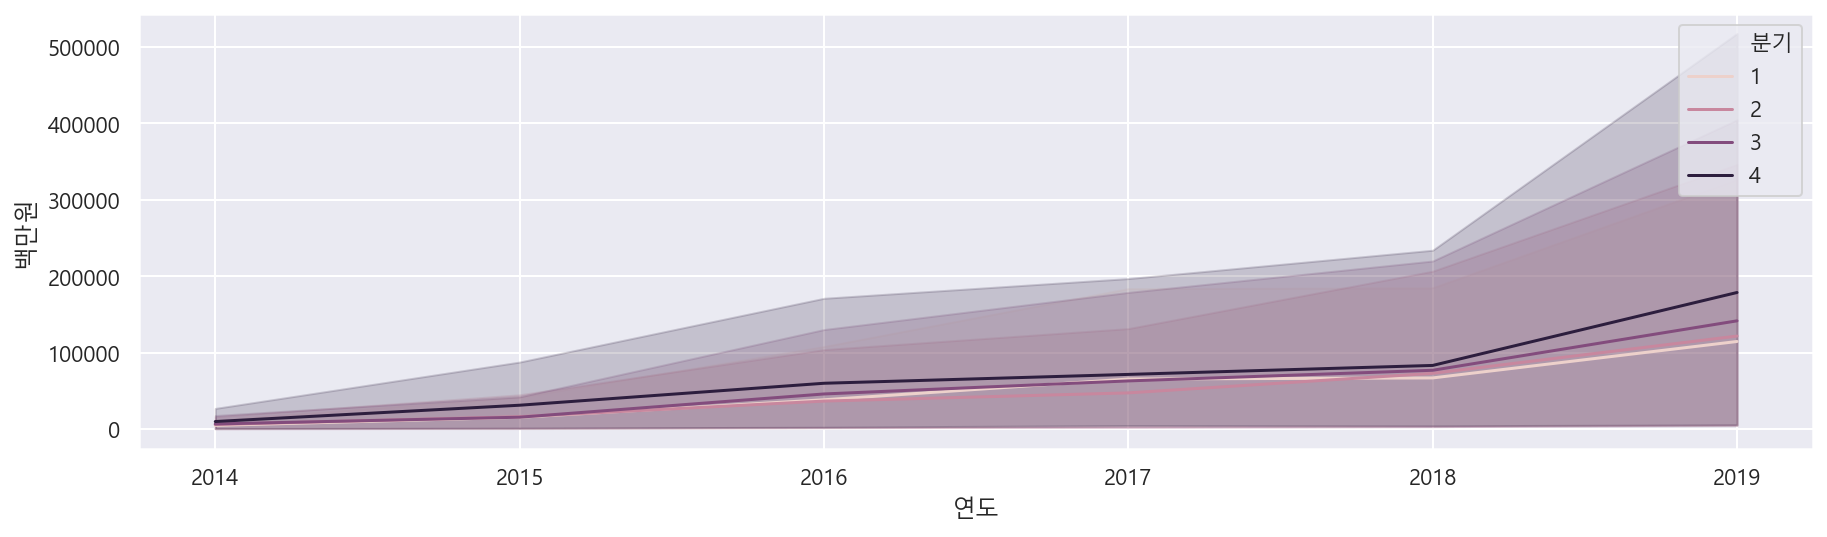

In [44]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic,x="연도",y="백만원",hue="분기")
#1분기보다 4분기가 판매액이 더 많다.

In [49]:
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,EU,화장품,계,2014 1/4,937.0,2014,1


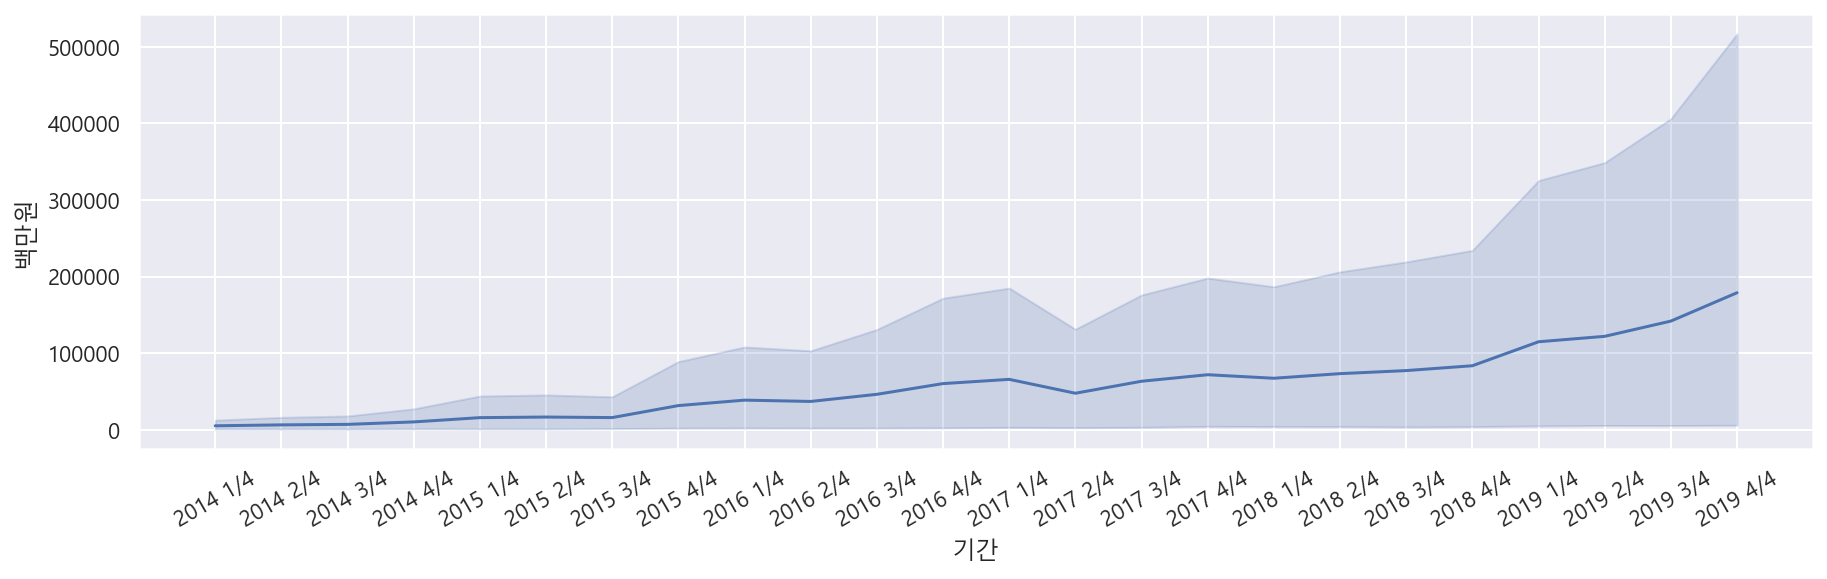

In [48]:
#화장품 판매액에 대한 기간별 금액 데이터 시각화
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic,x="기간",y="백만원")
#판매액은 쭉 증가해 왔다.

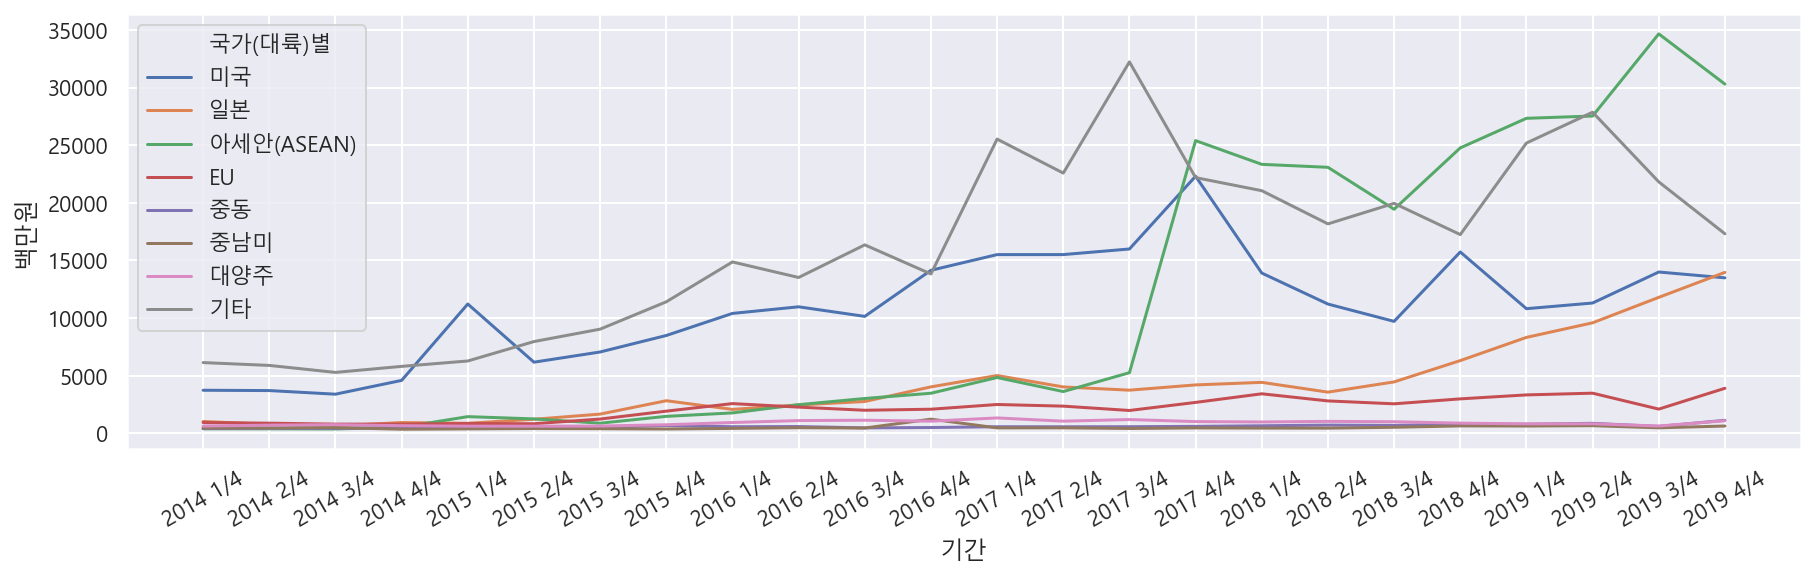

In [52]:
#중국을 제외한 기간별 판매액
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] !="중국"],
             x="기간",y="백만원",hue="국가(대륙)별")

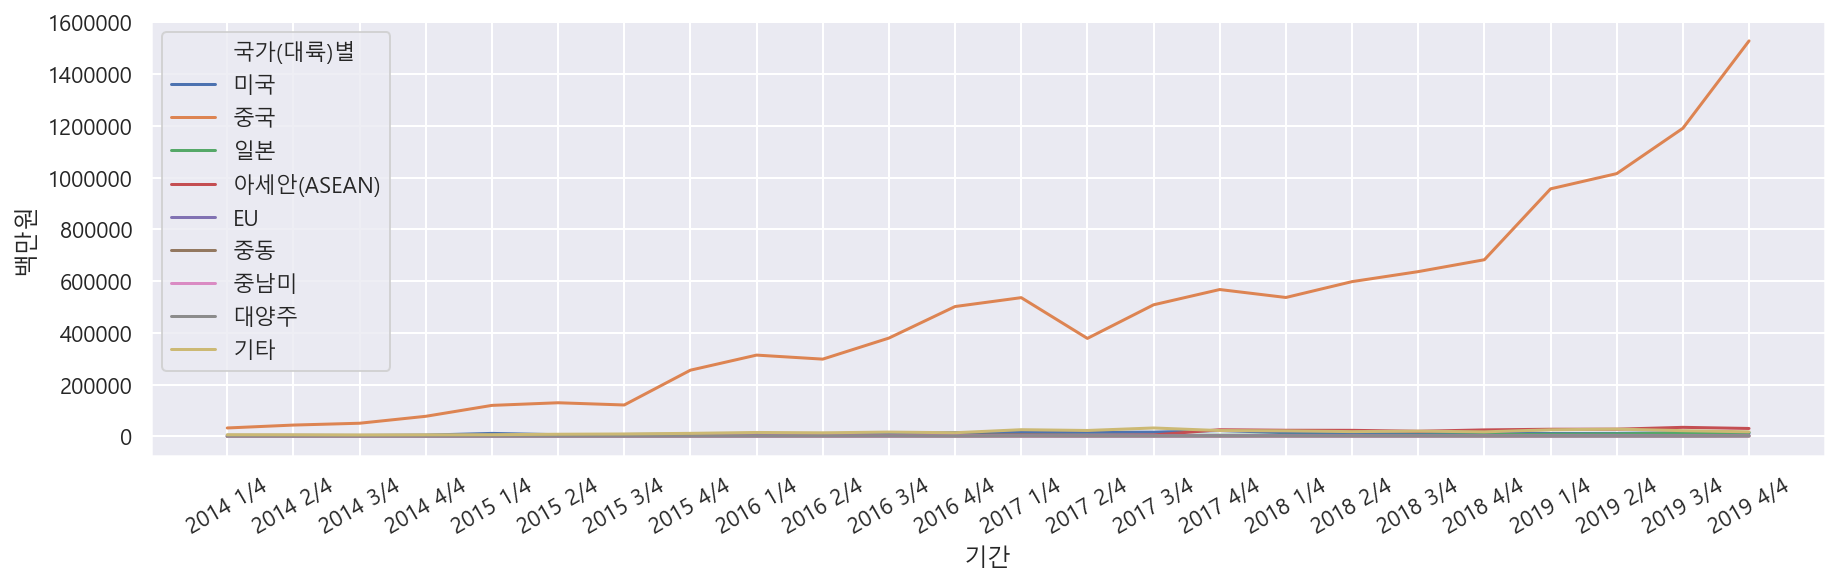

In [53]:
#중국 포함 기간별 판매액
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic,
             x="기간",y="백만원",hue="국가(대륙)별")

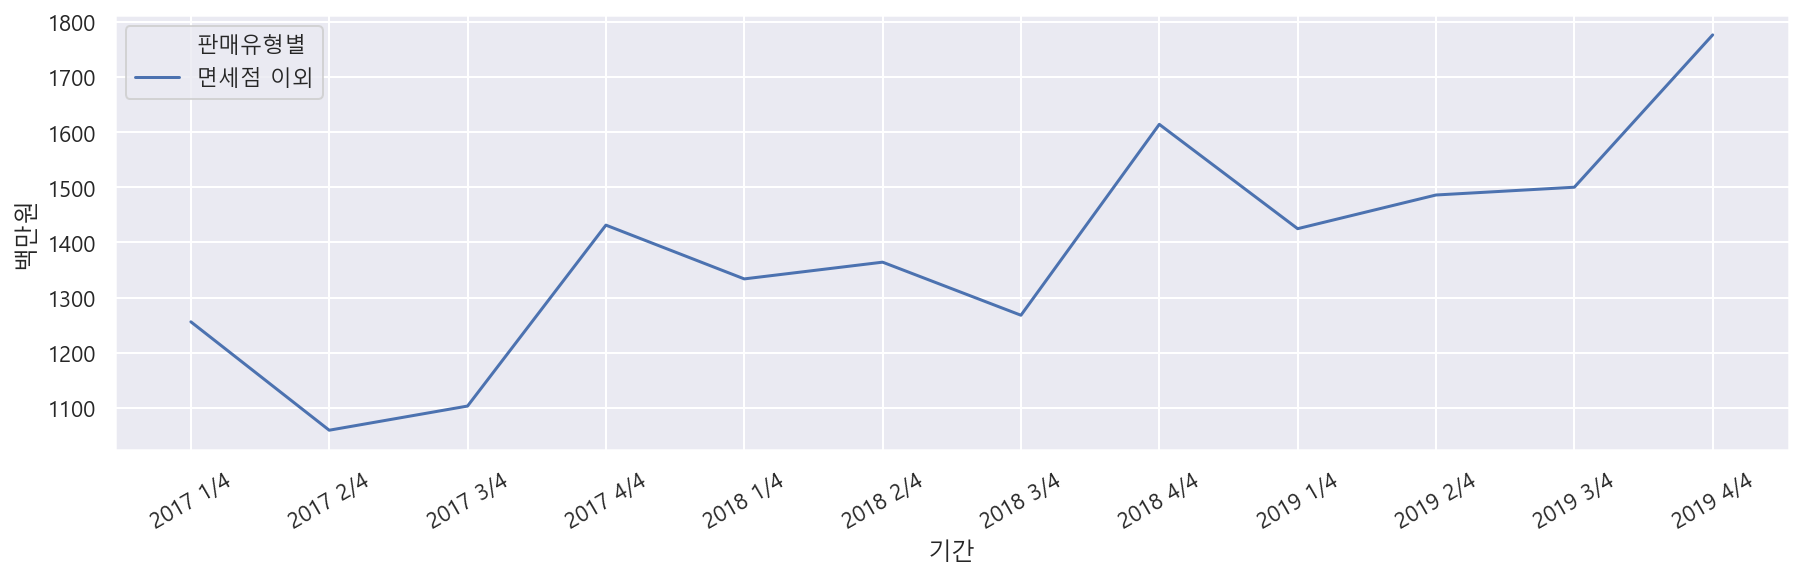

In [61]:
#화장품 판매액에 대한 기간별 금액 데이터 시각화하고 
#"판매유형별"로 다른 색상으로 표시하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub= df[(df["판매유형별"]!="계")&(df["판매유형별"]!="면세점")].copy()
sns.lineplot(data=df_sub,x="기간",y="백만원",hue="판매유형별",ci=None)

### 6.3 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [63]:
#계가 있으면 17년 전까지 나타내기 힘들다.Nan값으로 채워져있다.
df_fashion = df[(df["상품군별"]=="의류 및 패션관련 상품")&
               (df["판매유형별"]=="계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1


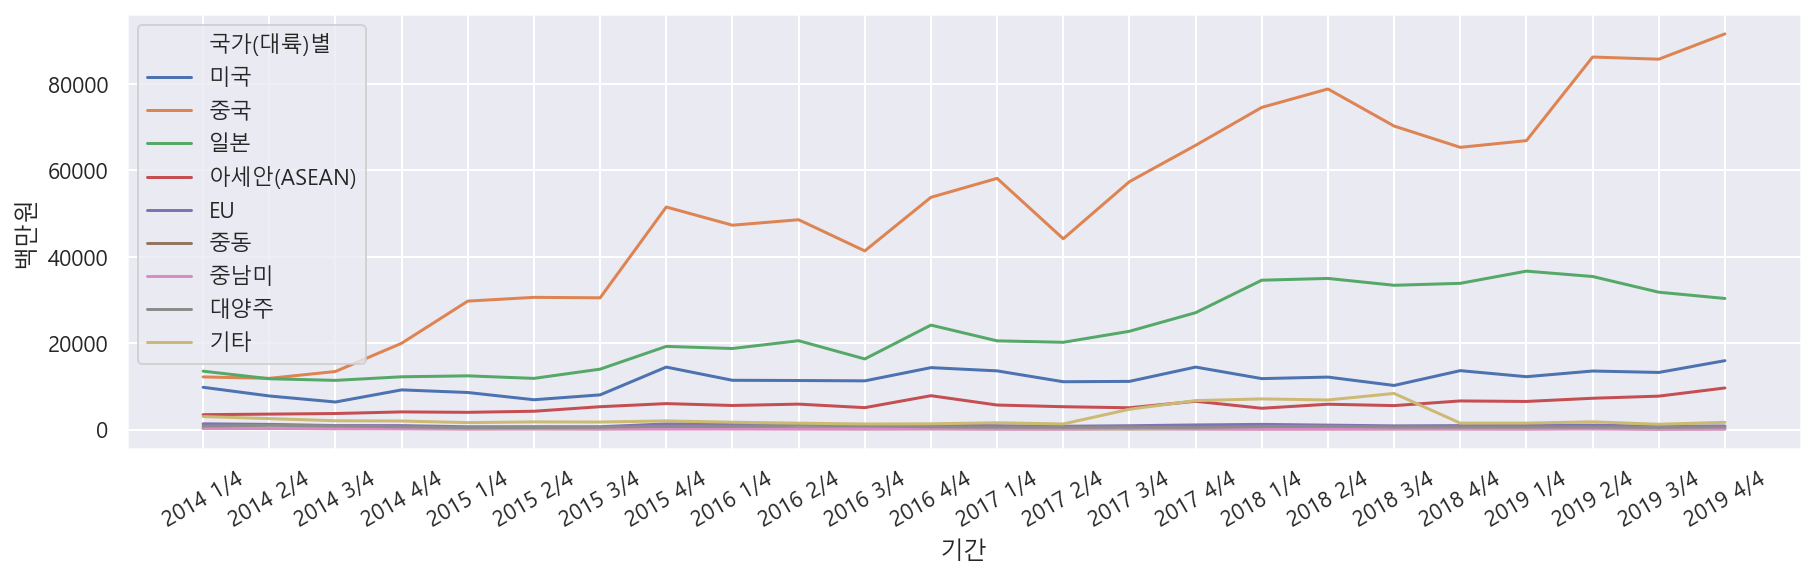

In [67]:
#의류 및 패션관련 상품 판매액에 대한 기간별 금액 데이터를 시각화하고
#국가(대륙)뼐 로 다른 생삭으로 표시하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion,x="기간",y="백만원",hue="국가(대륙)별")

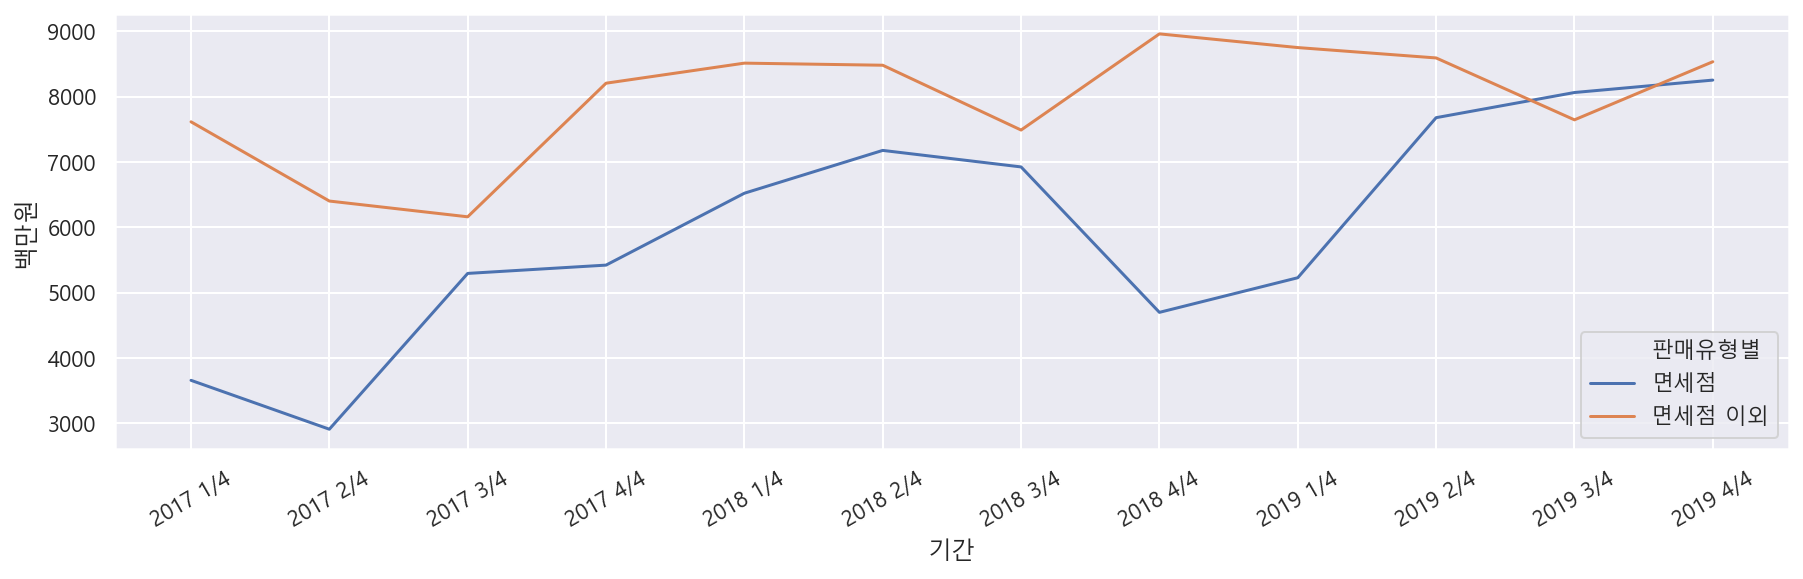

In [70]:
#의류 및 패션관련 상품 판매액에 대한 기간별 금액 데이터를 시각화하고
#판매유형별 로 다른 생삭으로 표시하기
df_fashion2 = df[(df["상품군별"]=="의류 및 패션관련 상품")&
               (df["판매유형별"] !="계")].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2,x="기간",y="백만원",hue="판매유형별",
            ci=None)

### 6.4 데이터 집계하기

In [77]:
df_fashion.head(2)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1


In [76]:
df_fashion["판매유형별"].value_counts()

계    216
Name: 판매유형별, dtype: int64

In [78]:
#피봇테이블로 "국가(대륙)별", "연도"별로 합계 금액을 표 형태로 구하기
result=df_fashion.pivot_table(index="국가(대륙)별",columns="연도",
                       values="백만원",aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6309.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2387.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55035.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31217.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134243.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330254.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


### 6.5 연산결과를 시각적으로 보기

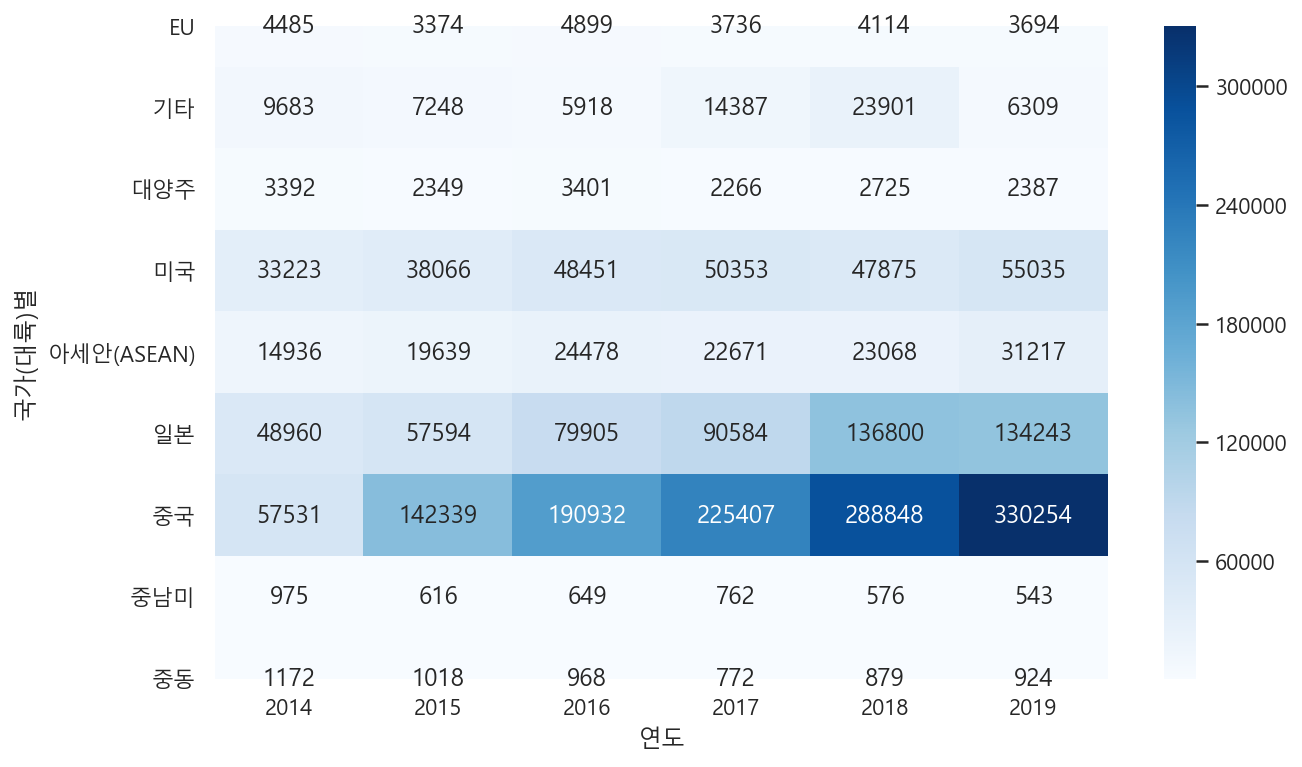

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(result,cmap="Blues",annot=True,fmt=".0f")

## 7. 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

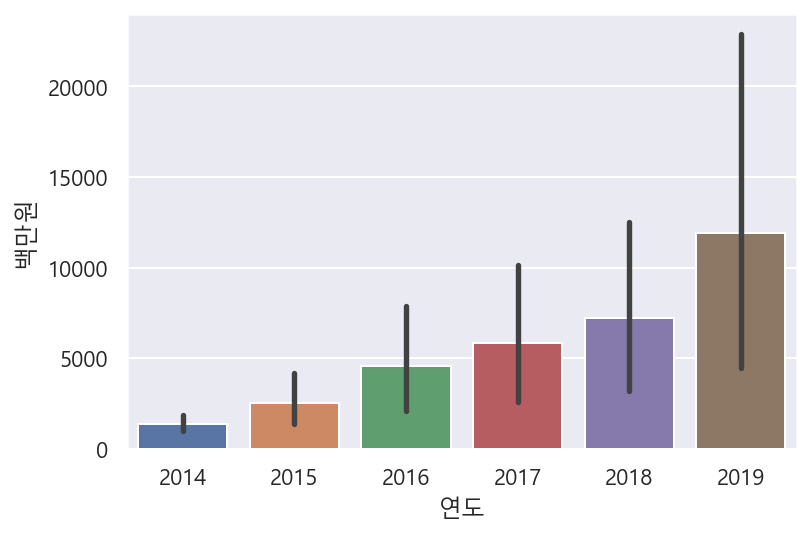

In [92]:
sns.barplot(data=df_total,x="연도",y="백만원")

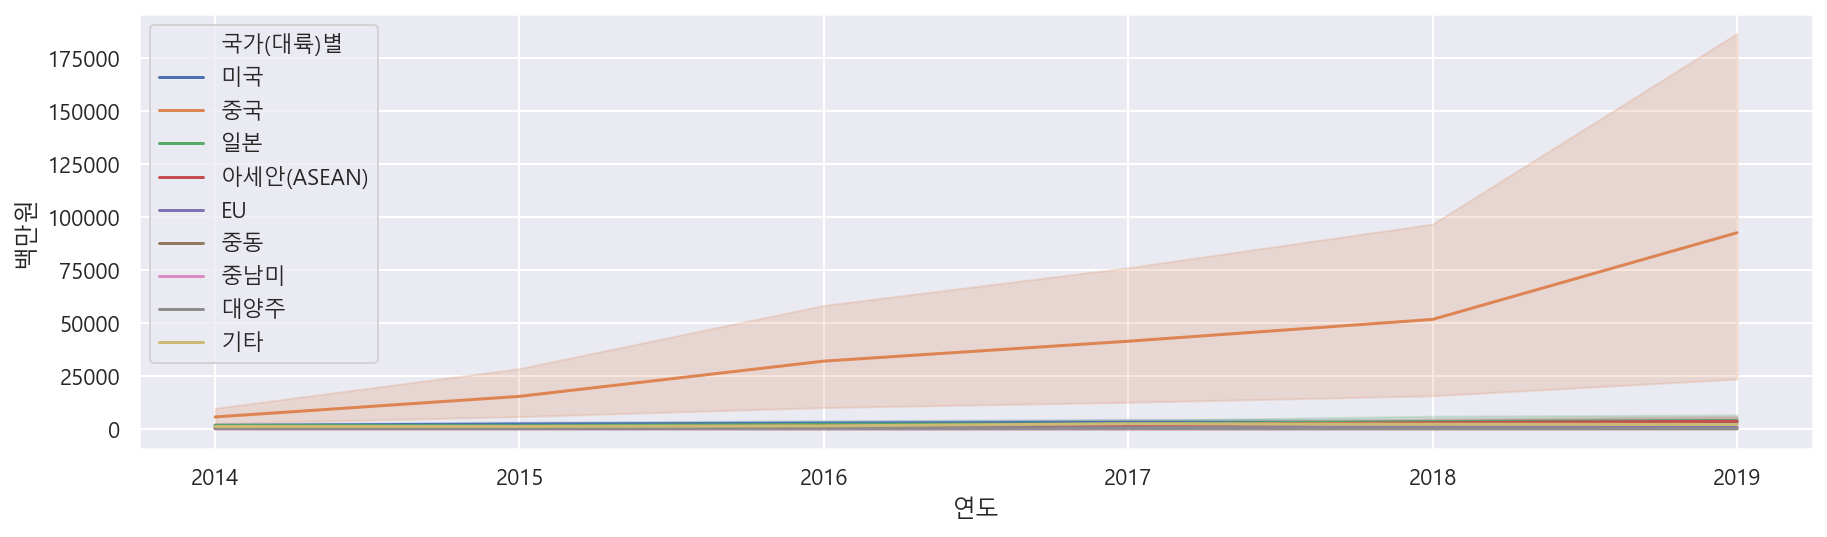

In [95]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total,x="연도",y="백만원",hue="국가(대륙)별")

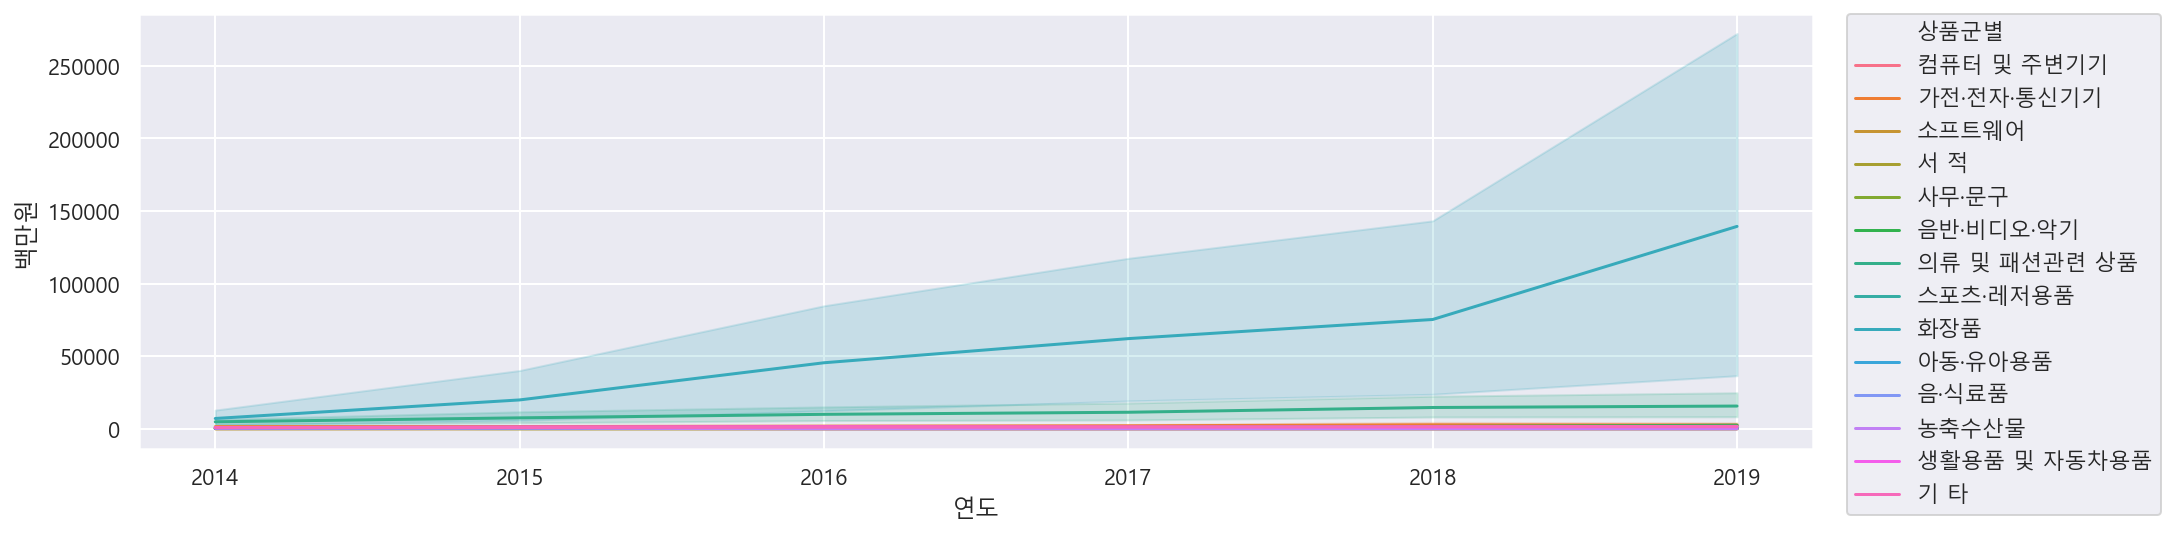

In [97]:
#연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total,x="연도",y="백만원",hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)